##  Nonlinear Supervised Learning Series 

# Part 4: Multi-layer perceptrons (MLPs)

Unlike polynomials and other fixed kernel bases, each element of a neural network basis has internal parameters that can be tuned to change the shape of the basis function considerably. In our general introduction to nonlinear supervised learning we described *single-layer* network elements, which are constructed by shoving a linear combination of input through a single nonlinear function like $\text{tanh}$ or the ReLU function. In this post we detail multi-layer networks - often called *multi-layer perceptrons* or *deep feedforward neural networks*. We begin by describing deep networks in the context of our previous discussion, as a particular catalog of nonlinear functions used for nonlinear supervised learning problems. We then turn to describe these network elements from a computational perspective, so that we can more easily see how to effectively compute with them.

In [1]:
#  This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1. Supervised learning with neural networks

As we have seen previously, at the heart of nonlinear regression and classification is the following simple yet powerful idea: curves of arbitrary shape can be approximated using a linear combination of nonlinear basis elements, denoted by

\begin{equation}
\text{predict}\left(x_1,x_2,\ldots,x_N\right)=w_{0}+\underset{i}{\sum}{w_{i}\,\,f_i\left(x_1,x_2,\ldots,x_N\right)}
\end{equation}

where $w_i$'s are tunable coefficients or weights of the linear combination, and $f_i$'s are the basis elements, each of which is a nonlinear function of the input. In this Section we discuss neural network bases and the algebraic form their member elements take, beginning with the simplest such basis: a single-layer neural network basis.  

## 1.1 Single-layer elements 

Elements of a single-layer neural network basis take the form 

\begin{equation}
f_i\left(x_1,x_2,\ldots,x_N\right)=a\left(w_{0,i}+\underset{n=1}{\overset{N}{\sum}}{w_{n,i}\,x_n}\right)
\end{equation}

where $a\left(\cdot\right)$ is the nonlinear mathematical function referred to in the parlance of neural networks as an *activation function*, and $w_{0,i}$, $w_{1,i}$, $\ldots$, $w_{N,i}$ are tunable weights. Two most popular choices of $a\left(\cdot\right)$ are the hyperbolic tangent function $\text{tanh}(\cdot)$ and the rectified linear unit $\text{max}\left(0,\cdot\right)$.

Because each single-layer element in (2) has *tunable internal parameters* it can take on a variety of shapes as we now explore through the following examples.

<hr>

#### <span style="color:#a50e3e;">Example 1. </span> The shape of single-layer elements with $\text{tanh}$ activation 

In the Python cell below we plot four single-layer elements with $\text{tanh}$ activation and scalar input (so that we can visualize the results), i.e.,

\begin{equation}
f_i\left(x\right)=\text{tanh}\left(w_{0,i}+w_{1,i}\,x\right), \qquad i=1,2,3,4
\end{equation}

In each instance the internal parameters have been set randomly, giving each instance a distinct shape.

<IPython.core.display.Javascript object>


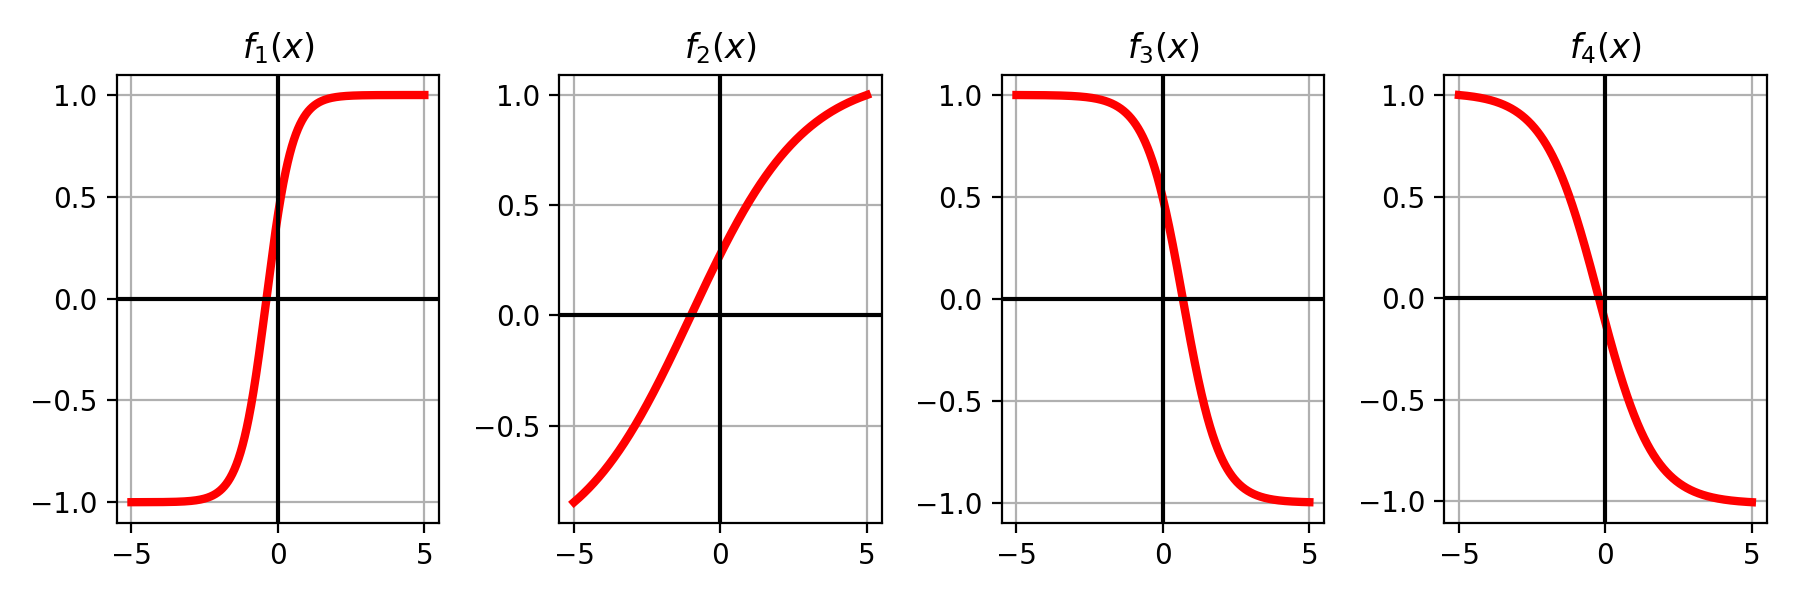

In [4]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 1, activation = 'tanh')

<hr>

#### <span style="color:#a50e3e;">Example 2. </span> The shape of single-layer elements with ReLU activation 

Using ReLU activation, in the Python cell below we create and plot four instances of a single-layer element with a scalar input, i.e.,

\begin{equation}
f_i\left(x\right)=\text{max}\left(0,w_{0,i}+w_{1,i}\,x\right), \qquad i=1,2,3,4
\end{equation}

Again, the internal parameters in each instance are chosen randomly. 

<IPython.core.display.Javascript object>


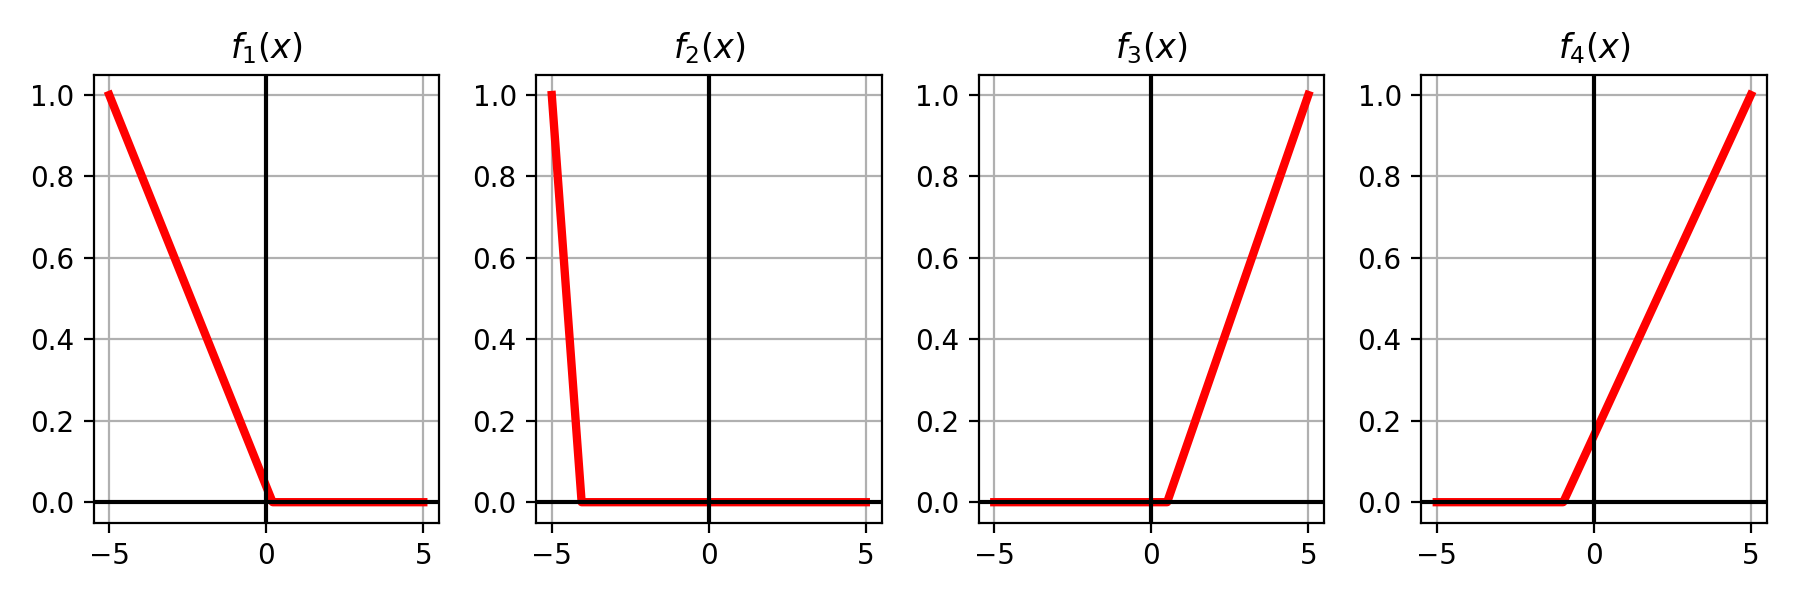

In [31]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 1, activation = 'relu')

<hr>

#### <span style="color:#a50e3e;">Flashback. </span> The advent of artificial neurons

Ever since Hippocrates argued, over two millennia ago, that the brain was 'the seat of the mind,' scientists have been studying it with the hope of unlocking the secrets of human intelligence. After all, artificial intelligence (AI) would be long solved if we truly understood how human intelligence worked. 

The first artificial neurons were proposed in the 1940s [[1,2]](#bib_cell). These early simplistic models, invented to explain how biological neurons (brain cells) operate inside the brain, culminated in the introduction of the *perceptron* model [[3]](#bib_cell) in 1957.

Figure 1 shows a comparative illustration of a biological neuron in left panel along with a *perceptron* in the right panel. The biological neuron consists of three main parts: *dendrites* (the neuron's receivers), *soma* (the cell body), and *axon* (the neuron's transmitter). Closely mimicking the biological neuron's structure, an artificial neuron comprises a set of dendrite-like edges, each taking an input and multiplying it by a (synaptic) weight associated with that edge. These weighted inputs are summed up after going through a *summation unit* (shown by a small hollow circle). The result is subsequently fed to an *activation unit* (shown by a large blue circle) whose output is then transmitted to the outside via an axon-like projection. The perceptron, taken as a whole, can be thought of as a visual representation of the single-layer element in equation (4).

From a biological perspective, neurons are believed to remain inactive until the net input to the cell body (soma) reaches a certain threshold, at which point the neuron gets *activated* and fires an electro-chemical signal. This is why the nonlinear function determining the shape of the output is referred to as the *activation function*.

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/biol_vs_art.png" width="100%" height="auto"/>
<figcaption> <strong>Figure 1:</strong> <em> (left) A typical biological neuron. (right) A perceptron - an artificial neuron - is believed to be a simplistic mathematical model for the biological neuron. The perceptron consists of: (i) weighted edges that represent the individual multiplications (of $1$ by $w_{0,i}$, $x_1$ by $w_{1,i}$, etc.), (ii) a summation unit shown as a small hollow circle representing the sum $w_0+w_{1,i}\, x_1+\cdots+w_{N,i}\, x_N$, and (iii) an activation unit shown as a larger blue circle representing the sum evaluated by the nonlinear activation function $a\left(\cdot\right)$. The perceptron, taken as a whole, can be thought of as a visual representation of the single-layer element in equation (4). </em>
</figcaption>
</figure>

A biological neuron is just a single cell, of which there are roughly $10^{11}$ inside the human brain. Therefore to perform any cognitive task, we need a sizable number of interconnected neurons - a *neural network* - to interact. For instance, somewhere between $10^{5}$ to $10^{6}$ neurons are required to render a realistic image of our visual surroundings [[4]](#bib_cell). Motivated by biological neural networks, artificial neural networks are created by arranging artificial neurons in a series of *layers*, giving rise to neural network bases with more than one layer which we discuss next.

## 1.2 Two-layer elements

That single-layer neural network elements have tunable internal parameters give them a range of possible shapes to take as saw in Examples 1 and 2. Notice, however, that the flexibility of each element is limited to some extent. In Example 1 all we can control is the horizontal placement of the function (via $w_{0,i}$) and the steepness of the transition from $-1$ to $1$ (via $w_{1,i}$). Similarly in Example 2, we can only move the ReLU in the horizontal direction (via $w_{0,i}$) and change the slope of its forearm (via $w_{1,i}$). 

One question immediately arises: how can we boost the flexibility (or expressive power) of a single-layer neural network basis? The answer is simple: we can just repeat what we did to form a single-layer element. Recall that a single-layer basis was created - as shown in equation (2) - by taking a linear combination of the input plus a bias weight and passing the result through an activation function. To create a more flexible basis then, we take a linear combination of (not the input this time but instead) single-layer elements - say, $U_1$ of them - plus a bias weight and shove them through $a\left(\cdot\right)$, resulting in 2-layer neural network elements of the form

\begin{equation}
f_j^{\left(2\right)}\left(x_1,x_2,\ldots,x_N\right)=a\left(w_{0,j}+\underset{i=1}{\overset{U_1}{\sum}}{w_{i,j}}\,\,f_i^{\left(1\right)}\left(x_1,x_2,\ldots,x_N\right)\right)
\end{equation}

where we have used superscripts on $f$'s in order to distinguish between between single-layer elements on the right hand side of (5) and two-layer elements on its left. 

Substituting the algebraic form for $f_i^{\left(1\right)}\left(x_1,x_2,\ldots,x_N\right)$ from (2) into (5), we have  

\begin{equation}
f_j^{\left(2\right)}\left(x_1,x_2,\ldots,x_N\right)=a\left(w^{\left(2\right)}_{0,j}+\underset{i=1}{\overset{U_1}{\sum}}{w^{\left(2\right)}_{i,j}}\,a\left(w^{\left(1\right)}_{0,i}+\underset{n=1}{\overset{N}{\sum}}{w^{\left(1\right)}_{n,i}\,x_n}\right)\right)
\end{equation}

where again, for organizational purposes, we have used superscripts on the weights as well. This helps distinguish between internal parameters of the signle-layer elements (superscripted as $1$) and the outer linear combination coefficients (superscripted as $2$).

The noticeably more complex form of 2-layer elements in (6) suggests that they can potentially be far more diverse in shape compared to their relatively simple single-layer counterparts in (2). Let us examine the validity of this proposition via the following example. 

<hr>

#### <span style="color:#a50e3e;">Example 3. </span> The shape of two-layer elements with with $\text{tanh}$ activation

In the Python cell below we show four instances of the 2-layer basis elements in equation (6) with scalar input (for visualization purposes) and $\text{tanh}$ as activation function, i.e.,

\begin{equation}
f_j^{\left(2\right)}\left(x\right)=\text{tanh}\left(w^{\left(2\right)}_{0,j}+\underset{i=1}{\overset{10}{\sum}}{w^{\left(2\right)}_{i,j}}\,\text{tanh}\left(w^{\left(1\right)}_{0,i}+{w^{\left(1\right)}_{1,i}\,x}\right)\right), \qquad j=1,2,3,4
\end{equation}


In each instance all internal parameters are set randomly. 

<IPython.core.display.Javascript object>


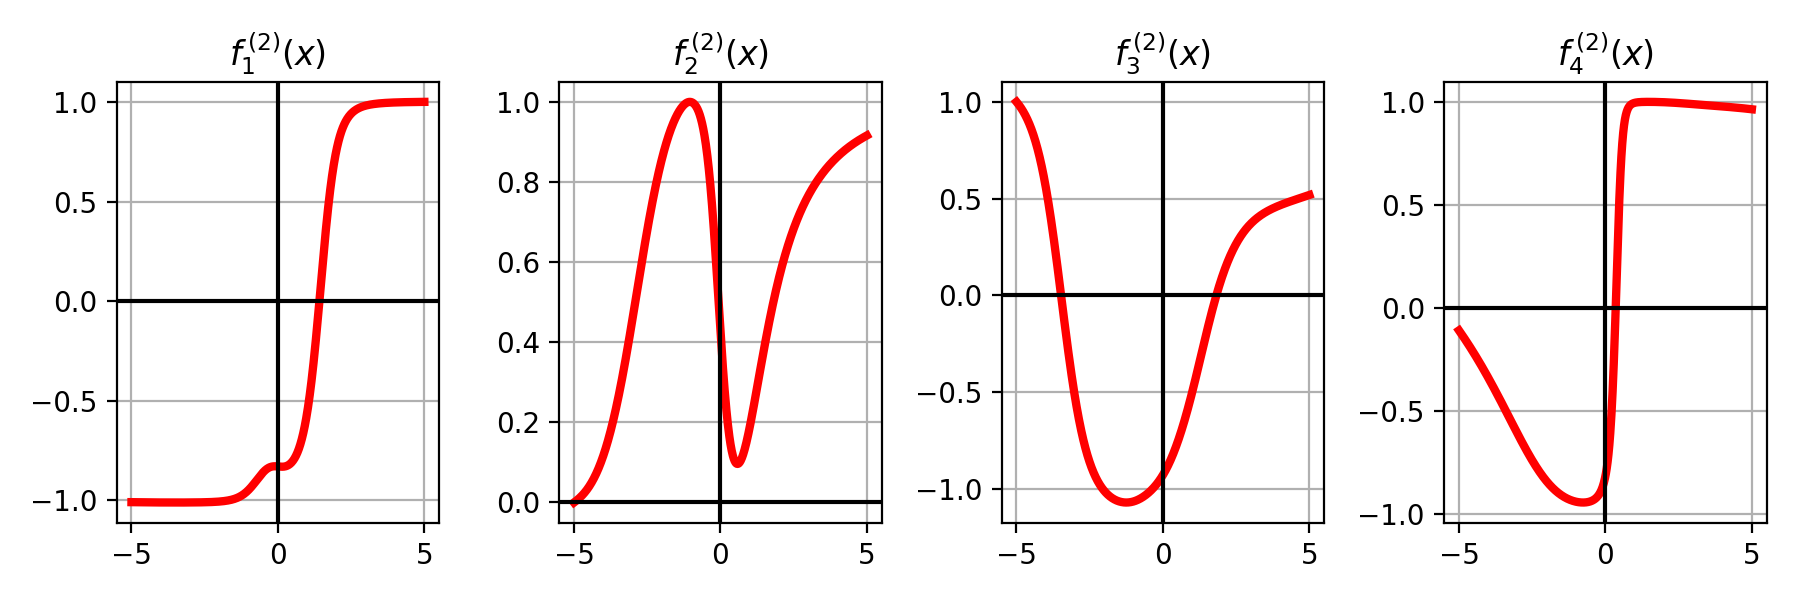

In [41]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 2, activation = 'tanh')

<hr>

Recall, the perceptron unit in Figure 3 is a visual representation of the single-layer element in equation (2). We derived in equation (6) the algebraic form of a two-layer element following a simple recipe: linearly combine single-layer elements and pass through activation. Therefore we should be able to construct a visual representation of two-layer elements from perceptron units using the same recipe. Figure 2 illustrates this idea. 

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/two_layer_elements.png" width="100%" height="auto"/>
<figcaption> <strong>Figure 2:</strong> <em> Visual representation of the two-layer basis element in equation (6). (left) A two-layer element is constructed by cascading a series of $U_1$ perceptron units, the first which is shaded gray here, and connecting their outputs to another perceptron unit in the second layer. (right) A more compact representation of the 2-layer element on the left. Here we show the input nodes only once, instead of duplicating them $U_1$ times, resulting in a more condensed but equivalent visual representation. Because in this case there is not enough space left to write the first layer weights next to their corresponding edges, we store them in an $\left(N+1\right)\times U_1$ matrix $\mathbf{W}_1$, shown symbolically via an orange square placed underneath the first layer edges.  </em>
</figcaption>
</figure>

## 1.3 General multi-layer elements

Now that we have seen how to boost the flexibility of neural network bases by creating two-layer elements from single-layer ones, nothing keeps us from utilizing this idea further to achieve even greater flexibility. The process is the same in general: take a linear combination of $\ell$-layer elements ($U_{\ell}$ of them to be precise) plus a bias weight and pass the result through another activation function. The $\ell+1$-layer element built recursively in this way takes the form

\begin{equation}
f_j^{\left(\ell+1\right)}\left(x_1,x_2,\ldots,x_N\right)=a\left(w_{0,j}^{\left(\ell+1\right)}+\underset{i=1}{\overset{U_\ell}{\sum}}{ w_{i,j}^{\left(\ell+1\right)}}\,\,f_i^{\left(\ell\right)}\left(x_1,x_2,\ldots,x_N\right)\right)
\end{equation}

Currently the convention is to refer to neural network bases with elements having three or more layers as *deep* networks.

<hr>

#### <span style="color:#a50e3e;">Example 4. </span> The shape of 10-layer elements with $\text{tanh}$ activation 

In the Python cell below we show four instances of neural network elements with $10$ layers that use $\text{tanh}$ as activation function. Again, in each instance all internal parameters are set randomly. 

<IPython.core.display.Javascript object>


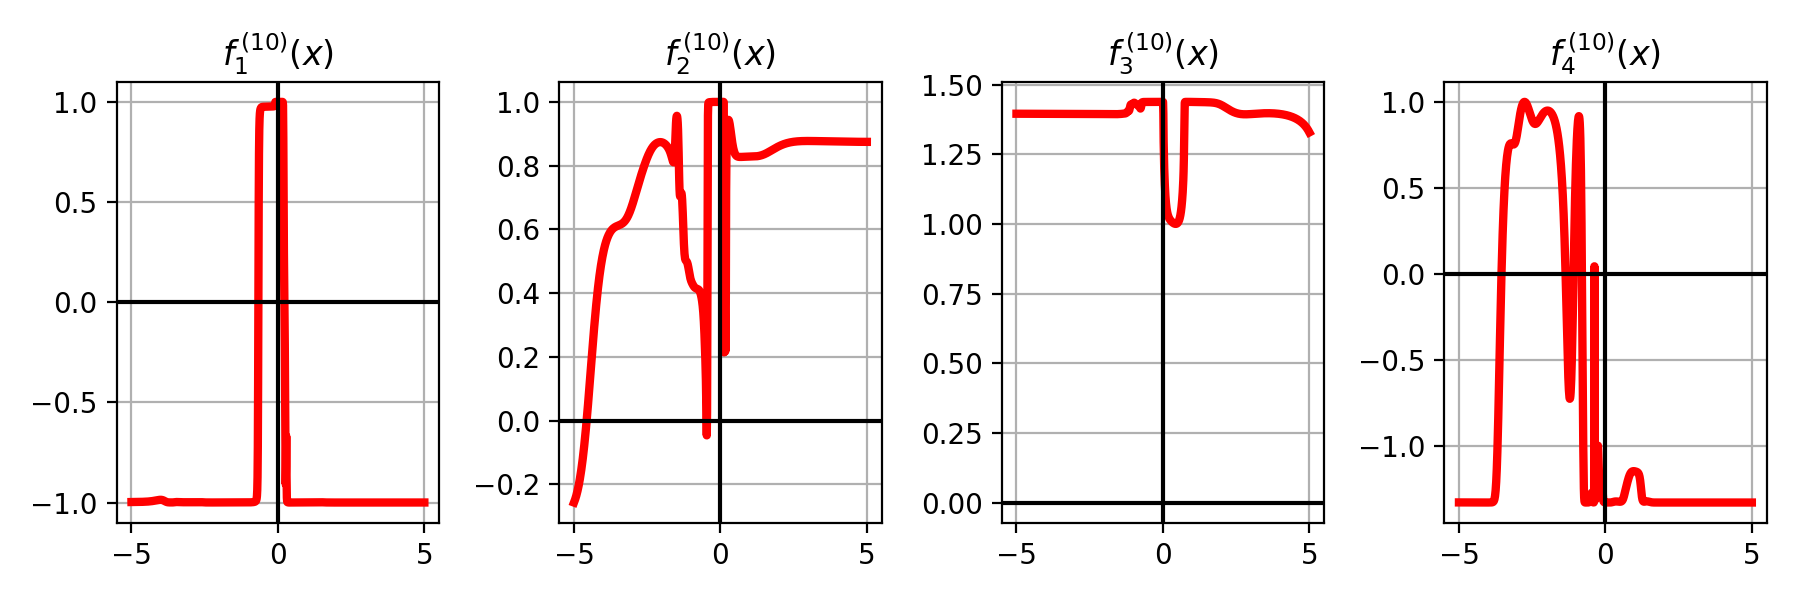

In [57]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 10, activation = 'tanh')

<hr>

#### <span style="color:#a50e3e;">Example 5. </span> Algebraic and visual form a 3-layer element

We have in equation (8) the general recursive formula to create neural network elements with arbitrary number of layers. Setting $\ell=2$ and using the formula for two-layer elements previously derived in equation (6) we have the following cumbersome equation for a 3-layer element


\begin{equation}
f_j^{\left(3\right)}\left(x_1,x_2,\ldots,x_N\right)=a\left(w^{\left(3\right)}_{0,j}+\underset{i=1}{\overset{U_2}{\sum}}{w^{\left(3\right)}_{i,j}}\,a\left(w^{\left(2\right)}_{0,i}+\underset{k=1}{\overset{U_1}{\sum}}{w^{\left(2\right)}_{k,i}}\,a\left(w^{\left(1\right)}_{0,k}+\underset{n=1}{\overset{N}{\sum}}w^{\left(1\right)}_{n,k}\,x_n\right)\right)\right)
\end{equation}

Similarly by combining 2-layer elements shown in the right panel of Figure 2 according to our recursive relation, we show in Figure 3 a visual representation of the 3-layer element in (9).  

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/three_layer_element.png" width="100%" height="auto"/>
<figcaption> <strong>Figure 3:</strong> <em> Visual representation of the three-layer basis element in equation (9). (left) A 3-layer element is constructed by cascading a series of $U_2$ 2-layer elements, the first which is shaded gray here, and connecting their outputs to another perceptron unit in the third layer. (right) A more condensed representation of the 3-layer element on the left, where the second layer weights are stored in an $\left(U_1+1\right)\times U_2$ matrix $\mathbf{W}_2$ shown symbolically via an orange square placed underneath the second layer edges. </em>
</figcaption>
</figure>

<hr>

As you saw in Example 5, both the algebraic formula and visual representation of deep networks become exceedingly unwieldy as we increase the number of layers, or in other words, the *depth* of the network. This is especially an issue when begin thinking about coding up these networks. Luckily, there are ways to represent deep networks more efficiently as we discuss next.     

## 1.4  Expressing deep networks for efficient computation

Rewriting equation (1) using general $L$-layer neural network elements we have 

\begin{equation}
\text{predict}\left(x_1,x_2,\ldots,x_N\right)=w_{0}+\underset{i=1}{\overset{U_L}{\sum}}{w_{i}\,\,f_i^{\left(L\right)}\left(x_1,x_2,\ldots,x_N\right)}
\end{equation}

where we have used $U_L$ of such elements. Generalizing the pattern we saw in Figures 2 and 3, we show a condensed graphical representation of (10) in Figure 4 wherein, as before, we have stored the internal weights of the $k^{th}$ layer in the matrix $\mathbf{W}_k$, defined for all $k=1,\ldots, L$ as

\begin{equation}
\mathbf{W}_{k}=\left[\begin{array}{cccc}
w_{0,1}^{\left(k\right)} & w_{0,2}^{\left(k\right)} & \cdots & w_{0,U_{k}}^{\left(k\right)}\\
w_{1,1}^{\left(k\right)} & w_{1,2}^{\left(k\right)} & \cdots & w_{1,U_{k}}^{\left(k\right)}\\
\vdots & \vdots & \ddots & \vdots\\
w_{U_{k-1},1}^{\left(k\right)} & w_{U_{k-1},2}^{\left(k\right)} & \cdots & w_{U_{k-1},U_{k}}^{\left(k\right)}
\end{array}\right]
\end{equation}  

Set $U_0=N$ to make (11) work when $k=1$. Additionally the linear combination weights of equation (10), i.e., $w_{0}$, $w_{1}$, $\ldots$, $w_{U_L}$, are collected in the vector $\mathbf{w}$

\begin{equation}
\mathbf{w}=\left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{U_L}
\end{array}\right]
\end{equation}

and stored in a diamond-shape box. Recall from our post on computation graphs that we use squares, diamonds, and circles to represent matrices, vectors, and scalars within computation graphs respectively. 

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/general_L_layer.png" width="100%" height="auto"/>
<figcaption> <strong>Figure 4:</strong> <em> A visual representation of the $\text{predict}$ expression in equation (10). The internal weights of the $k^{th}$ layer are collected in the matrix $\mathbf{W}_k$ defined in (11), and the linear combination weights in the end are stored in the vector $\mathbf{w}$ defined in (12). </em>
</figcaption>
</figure>

The visual representation of (10) in Figure 4 is still bulky and redundant. Denote $\mathbf{x}$ as the $\left(N+1\right)\times 1$ input vector

\begin{equation}
\mathbf{x}=\left[\begin{array}{c}
1\\
x_{1}\\
\vdots\\
x_{N}
\end{array}\right]
\end{equation}
  

and $\mathbf{a}$ as the vector function that takes in a general $d$-dimensional vector $\mathbf{v}$ and returns as output, the $d+1$ dimensional vector 

\begin{equation}
\mathbf{a}\left(\mathbf{v}\right)=\left[\begin{array}{c}
1\\
a\left(v_{1}\right)\\
\vdots\\
a\left(v_{d}\right)
\end{array}\right]
\end{equation}

With these two additional pieces, we can now write (10) very compactly as

\begin{equation}
\text{predict}\left(\mathbf{x}\right)=\mathbf{w}^T\,\mathbf{a}\left(\mathbf{W}_L^T\,\mathbf{a}\,\left(\mathbf{W}_{L-1}^T\,\cdots\,\mathbf{a}\,\left(\mathbf{W}_{2}^T\,\mathbf{a}\left(\mathbf{W}_{1}^T\,\mathbf{x}\right)\right)\right)\right)
\end{equation}

whose computation graph, shown in Figure 5, is an equivalent but more convenient way of representing (10) in Figure 4. Additionally, this computation graph helps us better understand how computation flows in neural networks. 

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/comp_graph_L_layer.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 5:</strong> <em> Computation graph of the $\text{predict}$ function in (15), as a  convenient replacement for the visual representation of an $L$-layer neural network in Figure 4. As is our convention with computation graphs, we represent scalar, vector, and matrix variables with circles, diamonds, and squares, respectively.  </em>
</figcaption>
</figure>

The recursive nature of the ``predict`` function in (15) allows for a compact and efficient implementation in ``Python``, as shown in the code cell below.  For ease of understanding we implement equation (15) using two ``Python`` functions.  Our ``predict`` function computes the final linear combination of the (evaluated network) features - written compactly as an inner product

\begin{equation}
\text{predict}\left(\mathbf{x},\omega\right) = \mathbf{w}^T\mathbf{f}
\end{equation}

where the set $\omega$ contains all $L$ weight matrices, and the final weights of the linear combination $\mathbf{w}$.  Here $\mathbf{f}$ - our fully evaluated network features - is computed in ``compute_features`` which compuates 

\begin{equation}
\text{compute_features}\left(\mathbf{x},\omega_{\text{inner}}\right)=\mathbf{a}\left(\mathbf{W}_L^T\,\mathbf{a}\,\left(\mathbf{W}_{L-1}^T\,\cdots\,\mathbf{a}\,\left(\mathbf{W}_{2}^T\,\mathbf{a}\left(\mathbf{W}_{1}^T\,\mathbf{x}\right)\right)\right)\right).
\end{equation}

Here $\omega_{\text{inner}}$ is the subset of $\omega$ containing the complete tensor of internal weights $\mathbf{W}_1$ through $\mathbf{W}_L$. 

In [2]:
# choose a nonlinear activation function 
def activation(t):
    # a relu function
    ## nonlinearity = np.maximum(0,t)  # default is the relu function
    
    # a tanh function
    nonlinearity = np.tanh(t)
    return nonlinearity

# fully evaluate our network features using the tensor of weights in omega_inner
def compute_features(x, omega_inner):
    o = np.ones((np.shape(x)[0],1))
    a_padded = np.concatenate((o,x),axis = 1)
    
    # loop through each layer matrix
    for W in omega_inner:
        # output of layer activation
        a = activation(np.dot(a_padded,W))
                
        #  pad with ones (to compactly take care of bias) for next layer computation
        o = np.ones((np.shape(a)[0],1))
        a_padded = np.concatenate((o,a),axis = 1)
        
    return a_padded

# our predict function 
def predict(x,omega):     
    # compute network features - here omega[0] contains the entire tensor of internal weights
    f = compute_features(x,omega[0])
    
    # compute linear model compactly via inner product - here omega[1] contains only those weights in the final linear combination of network features
    vals = np.dot(f,omega[1])
    return vals

Below we also provide a ``Python`` function ``initialize_network_weights`` that creates initial weights for a feedforward network, and also provides a simple interface for generating feedforward architectures with arbitrary numbers of hidden layers / units.  To create a desired network you simply input a **comma-separated list** called ``layer_sizes`` into the function of the following form

\begin{equation}
\text{layer_sizes} = \begin{bmatrix}
N = \text{dimension of input }\mathbf{x} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \\
U_1 = \text{number of desired units in layer 1} \\
U_2 = \text{number of desired units in layer 2} \\
\vdots \\
U_L = \text{number of desired units in layer L} \\
M = \text{dimension of output } y \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\end{bmatrix}
\end{equation}

The initializer will then automatically create initial weight matrices (of the proper dimensions) $\mathbf{W}_1$ through $\mathbf{W}_L$ as well as the final weights for the linear combination in the prediction $\mathbf{w}$.  We will see explicit examples using this functionality - as well as the previous ``Python`` functions - in the examples below.

In [3]:
# create initial weights for arbitrary feedforward network
def initialize_network_weights(layer_sizes):
    # container for entire weight tensor
    weights = []
    
    # scale for random initial values of each weight matrix
    scale = 0.5
    
    # loop over desired layer sizes and create appropriately sized initial 
    # weight matrix for each layer
    for k in range(len(layer_sizes)-1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k + 1,U_k_plus_1)
        weights.append(weight)

    # re-express weights so that w_init[0] = omega_inner contains all 
    # internal weight matrices, and w_init = w contains weights of 
    # final linear combination in predict function
    w_init = [weights[:-1],weights[-1]]
    
    return w_init

#### <span style="color:#a50e3e;">Example 6. </span>  A nonlinear regression example using a deep feedforward network

In this example we demonstrate the usage of the ``Python`` functionality below to create an arbitrary feedforward network architecture to perform nonlinear regression using the toy dataset below.

<IPython.core.display.Javascript object>


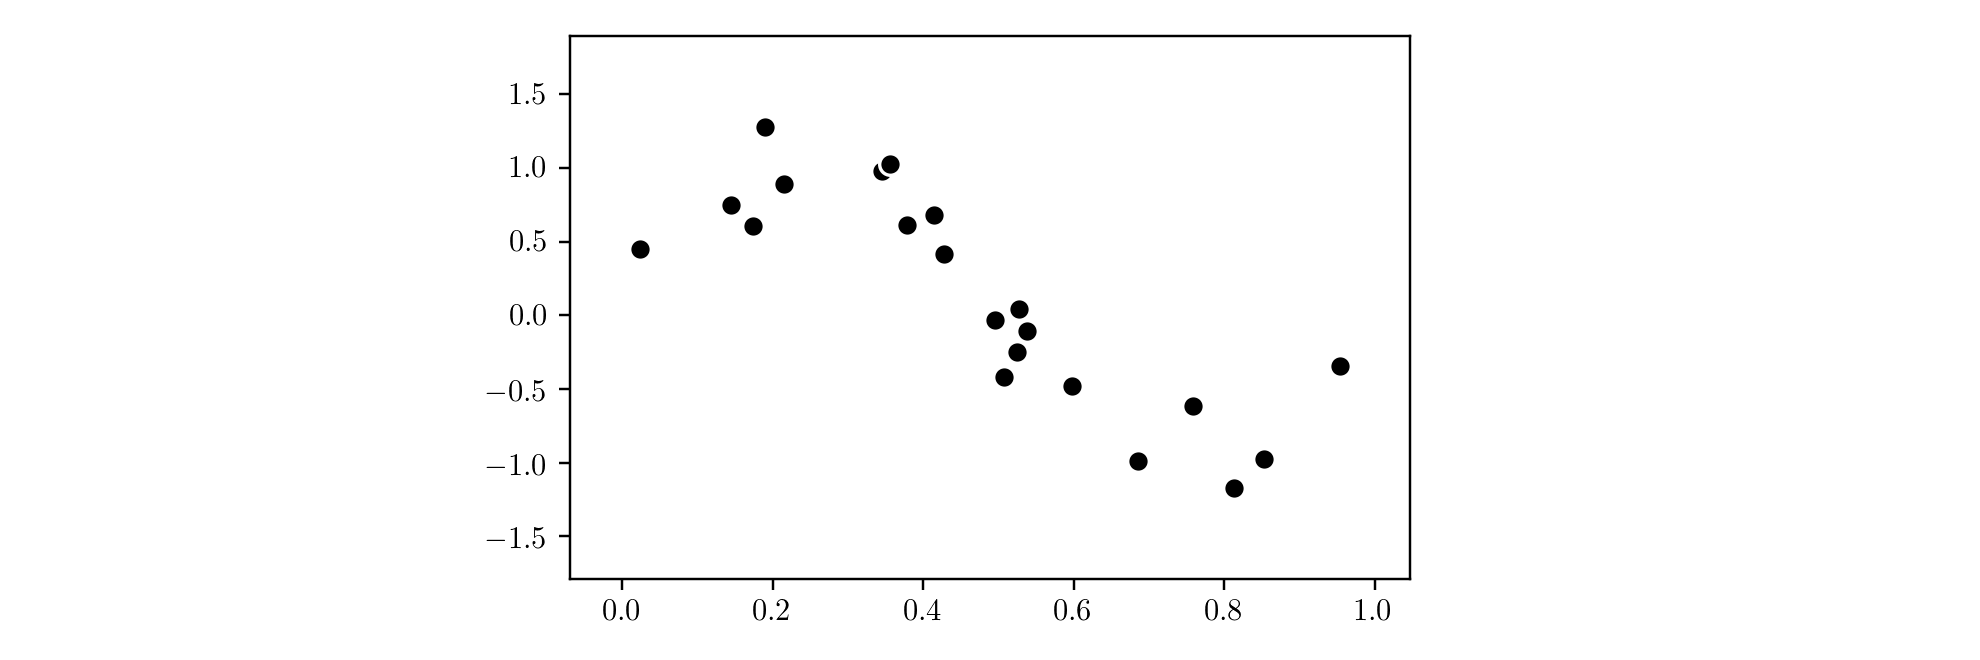

In [23]:
# load data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,:-1]
y = data[:,-1:]

# plot everything
demo = nonlib.custom_plotter.Visualizer()
demo.plot_regression_data(x,y)

Here we will use a 4 layer network with 10 units in each layer.  This will certainly overfit the dataset if we tune the parameters well!

In the next Python cell we create the handle list ``layer_sizes`` for our network and generate the initial weights.

In [5]:
# An example 4 hidden layer network, with 10 units in each layer
N = np.shape(x)[1]
M = np.shape(y)[1]
U_1 = 10
U_2 = 10
U_3 = 10
U_4 = 10

# the list defines our network architecture
layer_sizes = [N, U_1,U_2,U_3,U_4,M]

# generate initial weights for our network
w_init = initialize_network_weights(layer_sizes)

With all of our weights initialized we can then use gradient descent to tune them properly (here we used the normalized version).  Below we define our ``least_squares`` cost function and run normalized gradient descent for 5000 iterations using a fixed steplength parameter $\alpha = 10^{-1}$.

In [6]:
# define the least squares cost function
least_squares = lambda w: np.sum((predict(x,w) - y)**2)

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
weight_history_1 = opt.gradient_descent(g = least_squares,w = w_init,max_its = 5000,alpha = 10**(-1),version = 'normalized',output = 'history')

We can then examine the cost function history to make sure gradient descent is converging properly.

<IPython.core.display.Javascript object>


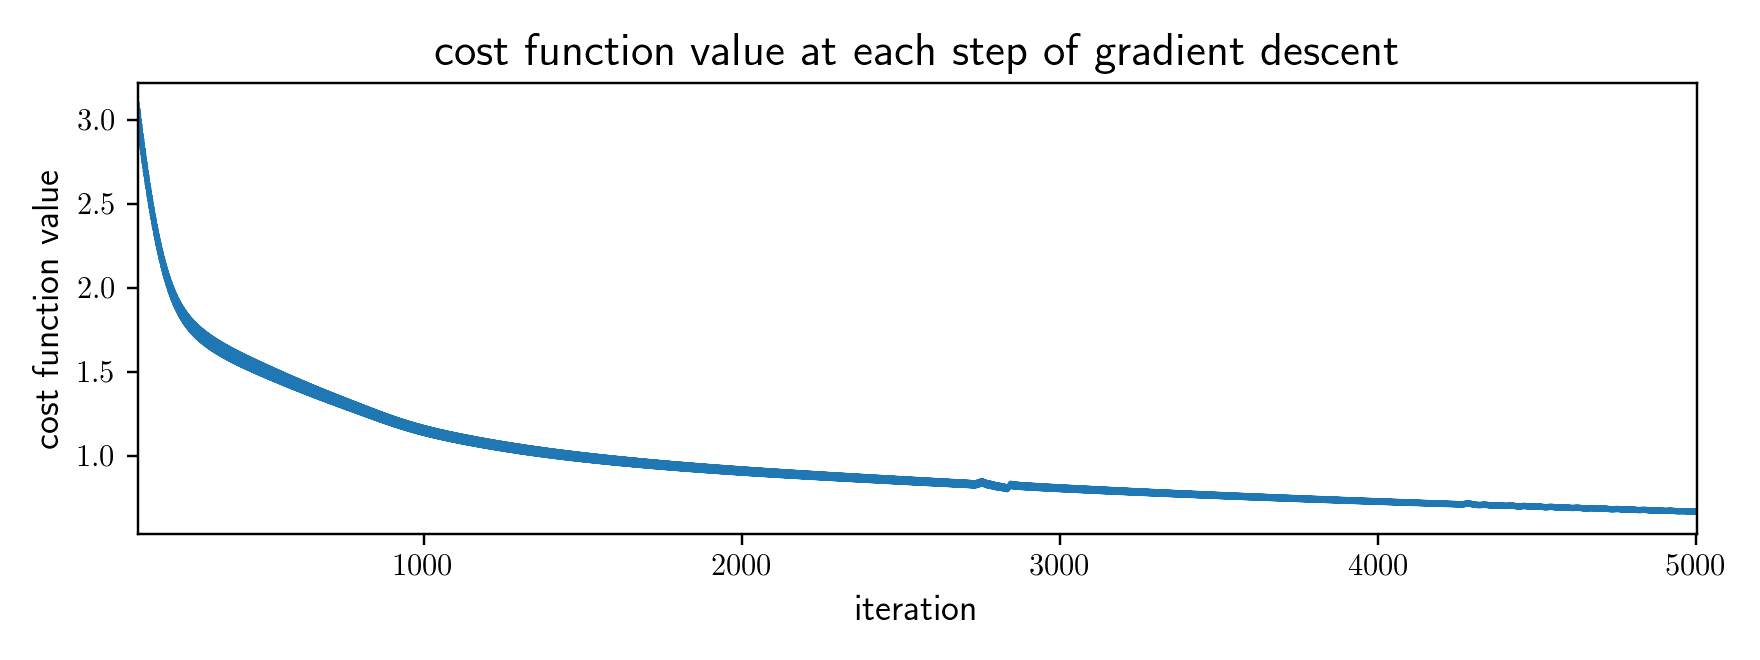

In [29]:
# plot the cost function history for our current run of gradient descent
cost_history_1 = [least_squares(v) for v in weight_history_1]
demo.compare_regression_histories(histories = [cost_history_1],start = 100)

The cost function plot looks good!  Taking the final weight from our history we can then evaluate testing points through our ``predict`` function.  In particular we can illustrate our nonlinear prediction - which we do below.  We certainly do overfit, but this is not a surprise since our network is so flexible (and we optimized it quite well).

<IPython.core.display.Javascript object>


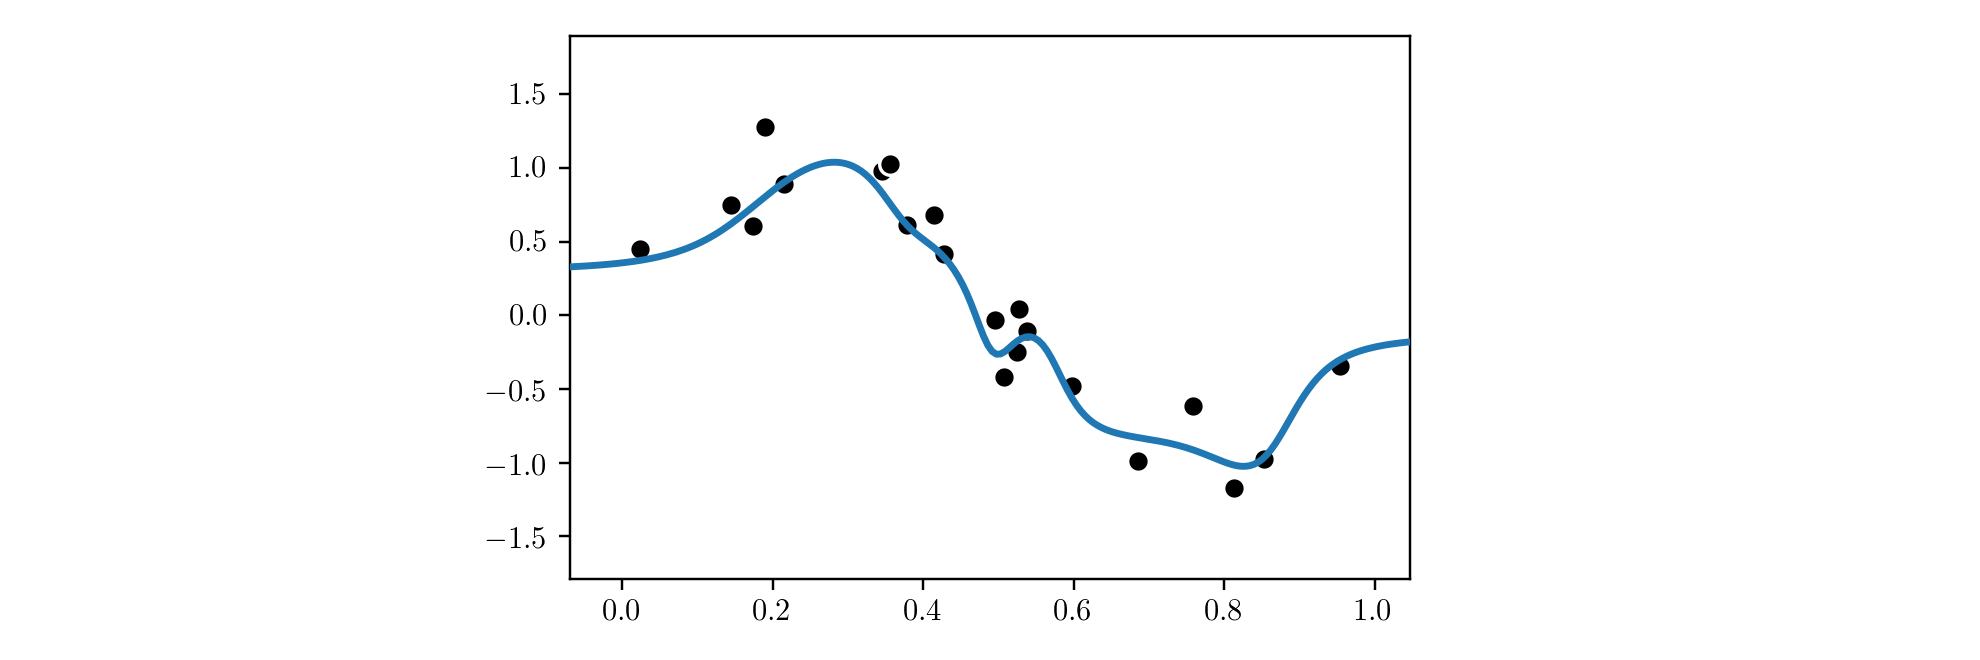

In [24]:
# plot the data and learned nonlinear network regressor
demo.plot_regression_data(x,y,predict = predict, weights = weight_history_1[-1])

#### <span style="color:#a50e3e;">Example 7. </span>  A nonlinear two-class classification example using a deep feedforward network

Here we use a network architecture to perform nonlinear classification using the following toy dataset.  The dataset is shown 'from above' in the left panel, where red points belong to class $+1$ and blue points to class $-1$, and from the side in the right panel.

<IPython.core.display.Javascript object>


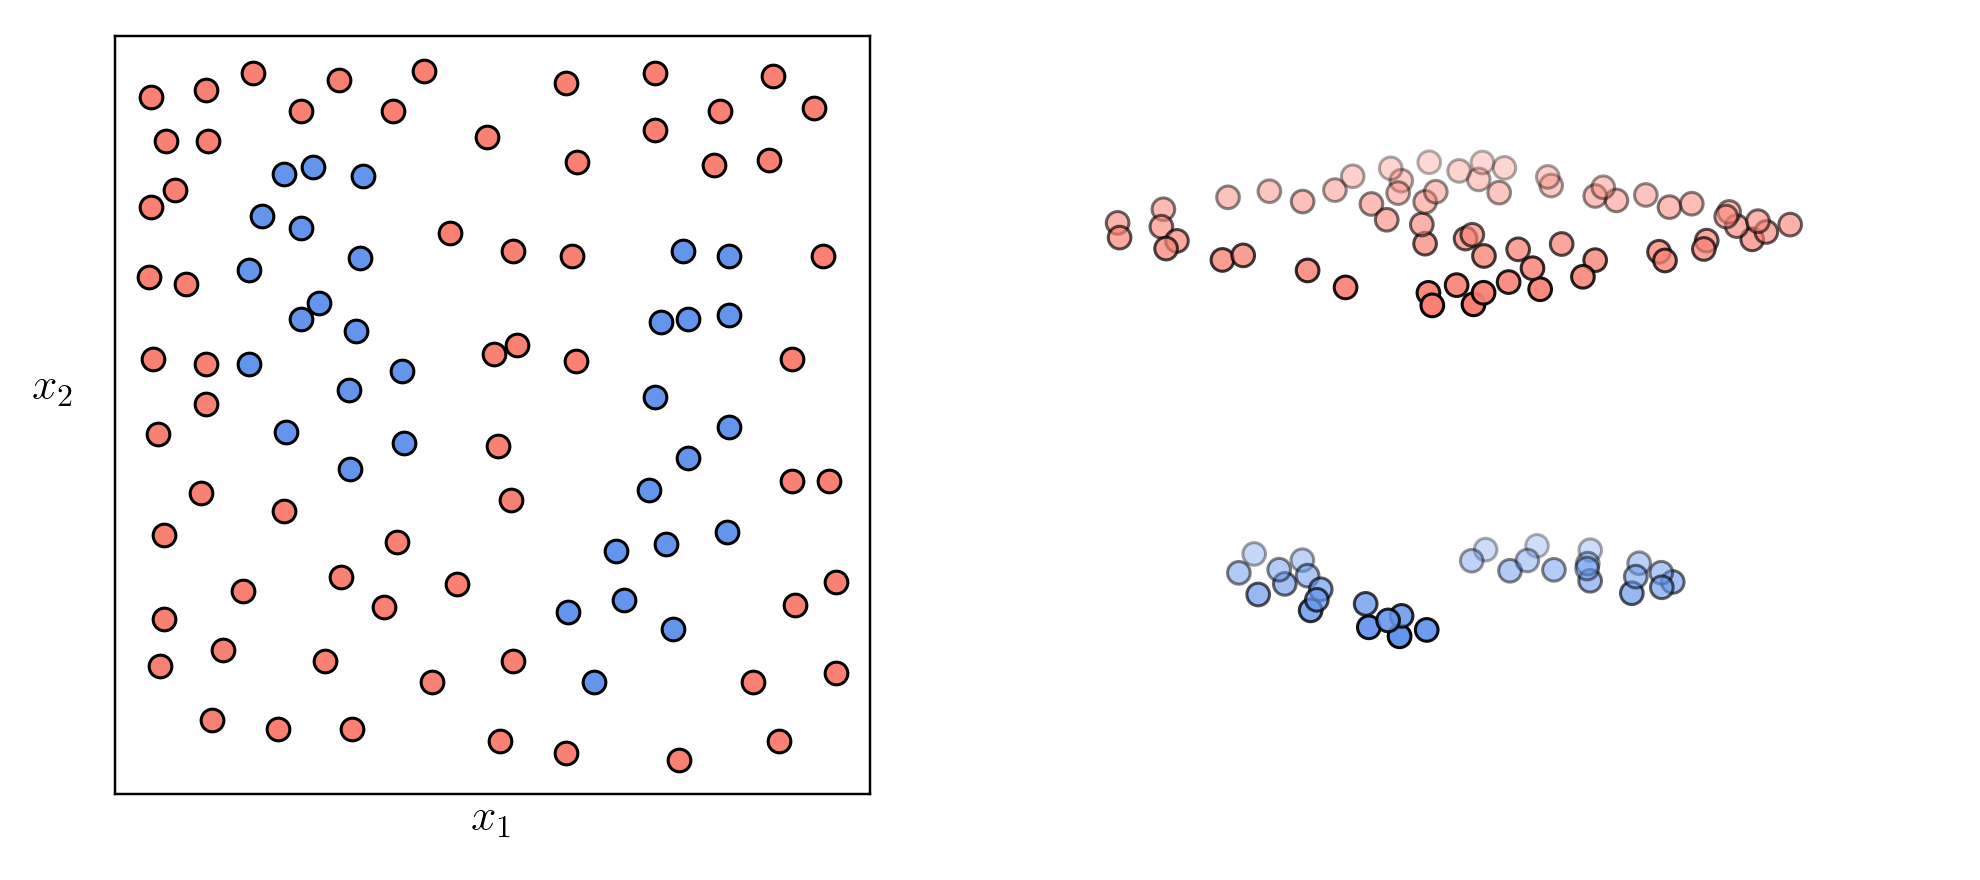

In [17]:
# load in two-class classification dataset
csvname = datapath + '2_eggs.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,:-1]
y = data[:,-1:]

# visualize the classification data
demo = nonlib.custom_plotter.Visualizer()
demo.plot_classification_data(x,y)

We will use the same network architecture used in the previous regression example here - 4 hidden layers with 10 units in each layer.  Below we initialize the network, mirroring this step in the previous example.

In [18]:
# An example 4 hidden layer network, with 10 units in each layer
N = np.shape(x)[1]
M = np.shape(y)[1]
U_1 = 10
U_2 = 10
U_3 = 10
U_4 = 10

# the list defines our network architecture
layer_sizes = [N, U_1,U_2,U_3,U_4,M]

# generate initial weights for our network
w_init = initialize_network_weights(layer_sizes)

Now we can tune the weights of our network architecture using a ``softmax`` (or logistic) cost function.  We provide a compact version of the softmax cost function below, and run normalized gradient descent for 5000 iterations using a steplength parameter $\alpha = 10^{-1}$.  

In [19]:
# define the least squares cost function
softmax = lambda w: np.sum(np.log(1 + np.exp(-y*predict(x,w))))
count = lambda w: 0.25*np.sum((np.sign(predict(x,w)) - y)**2)

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
weight_history_2 = opt.gradient_descent(g = least_squares,w = w_init,max_its = 5000,alpha = 10**(-1),version = 'normalized',output = 'history')

With gradient descent run, we plot the cost function history as well as the number of misclassifications at each step of gradient descent.  In order to produce the latter calculation we write a compact counting cost function called ``count`` below.

<IPython.core.display.Javascript object>


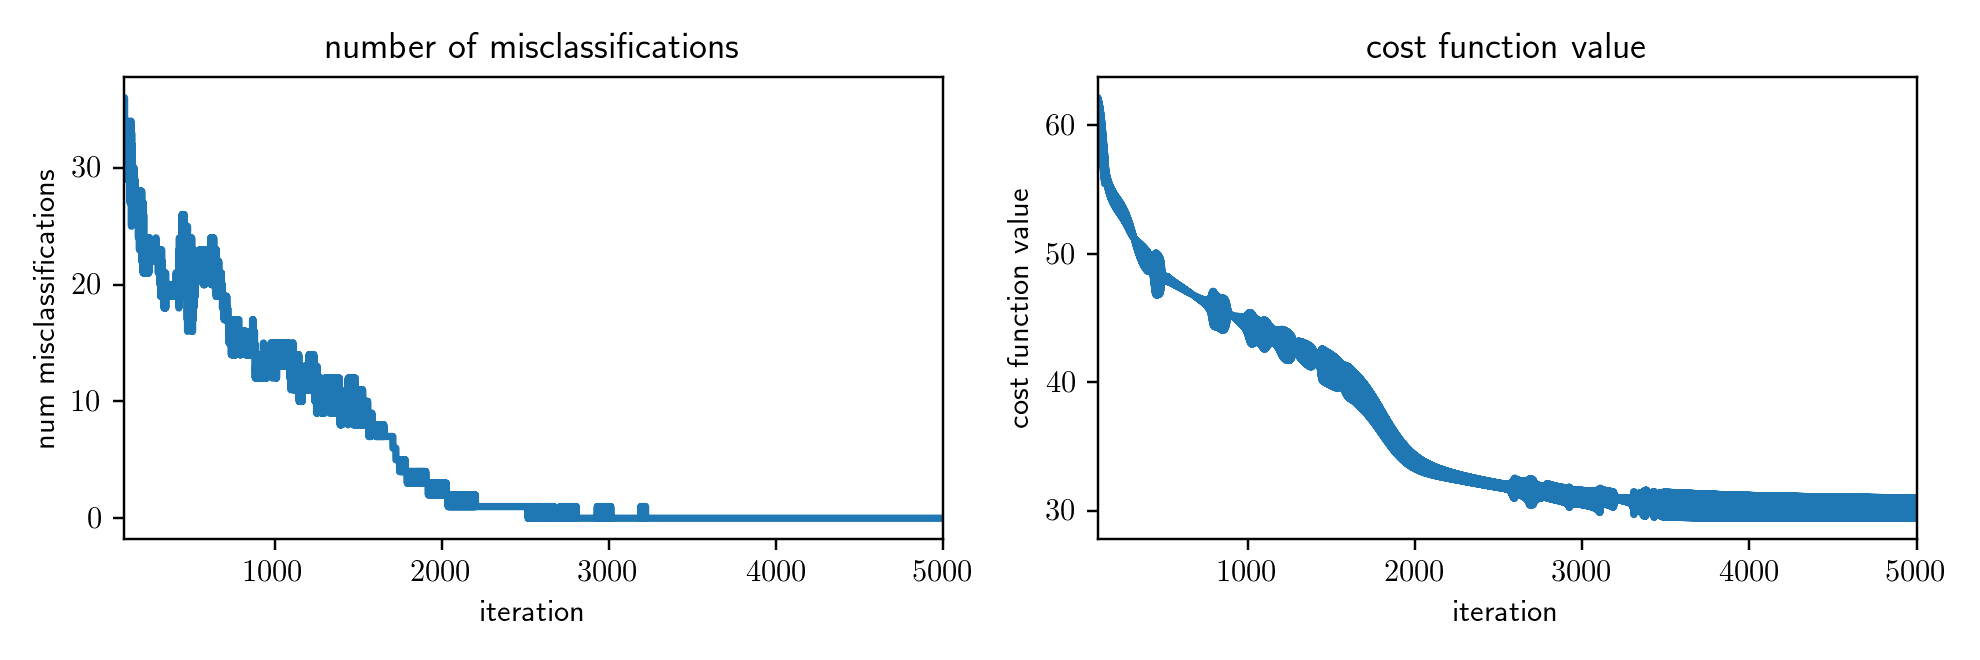

In [20]:
# our counting cost - to count misclassifications
count = lambda w: 0.25*np.sum((np.sign(predict(x,w)) - y)**2)

# plot the cost function history for our current run of gradient descent
count_history_2 = [count(v) for v in weight_history_2]
cost_history_2 = [softmax(v) for v in weight_history_2]
demo.compare_classification_histories(count_histories=[count_history_2],cost_histories=[cost_history_2],start=100)

Finally, we visualize the fit provided by the final weights learned via gradient descent.  Here it is harder to visually determine whether or not we have overfit when viewing the fit from above (in the left panel), since points from the two classes are so nicely separable by closed curves.  However when you look at the fit from the side (in the right panel) you can see how the learned surface is extremely ripply (a sign that we overkilled this particular dataset using such a flexible network).

<IPython.core.display.Javascript object>


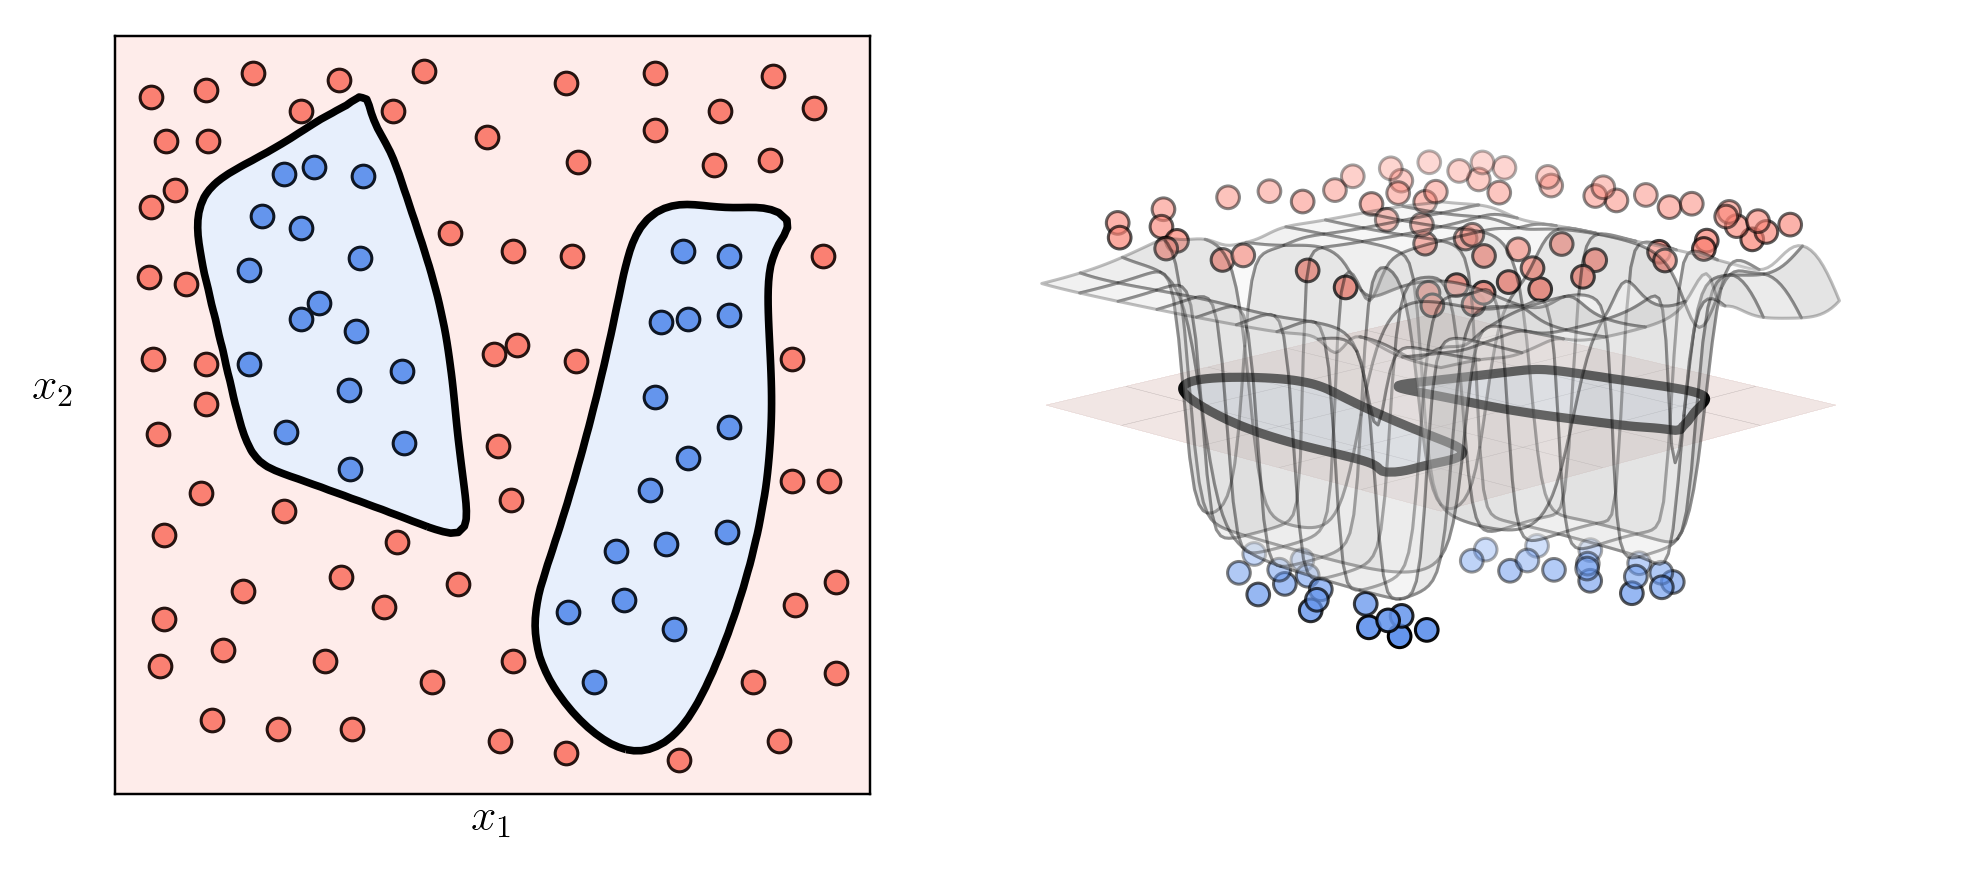

In [21]:
# plot the dataset along with classification boundary (in the left panel) and corresponding surface fit (in the right panel)
demo.plot_classification_data(x,y,predict = predict,weights = weight_history_2[-1])

<a id='bib_cell'></a>

## References

[1]  W. S. McCulloch and W. Pitts. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943.

[2]  D. O. Hebb. The organization of behavior: a neuropsychological theory. John Wiley & Sons, New York, 1949.

[3]  F. Rosenblatt. The perceptron - a perceiving and recognizing automaton. Cornell Aeronautical Laboratory, 1957.

[4]  B. Merker. From probabilities to percepts: a subcortical "global best estimate buffer" as locus of phenomenal experience". In: S. Edelman, T. Fekete and N. Zach (Eds.) Being in time: Dynamical models of phenomenal experience. (pp. 37–79). John Benjamins Publishing Company, Amsterdam, 2012.